In [1]:
import pandas as pd

In [5]:
titanic = pd.read_csv('titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Calculate Summary Statistics
Aggregating Statistics
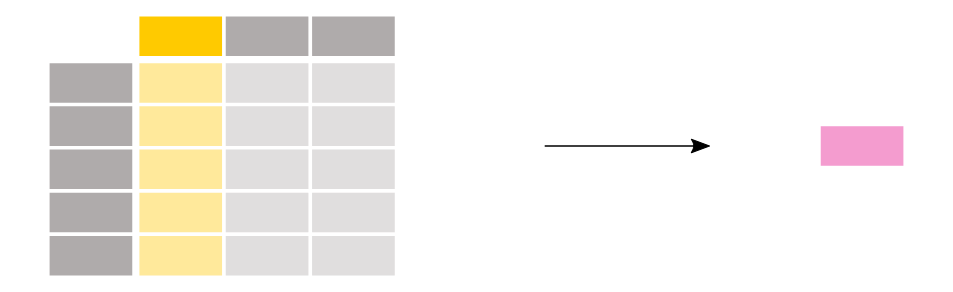


In [6]:
# Average age of the Titanic Passengers
titanic['Age'].mean()

np.float64(29.69911764705882)

In [ ]:
# Different statistics are available and can be applied to columns with numerical data

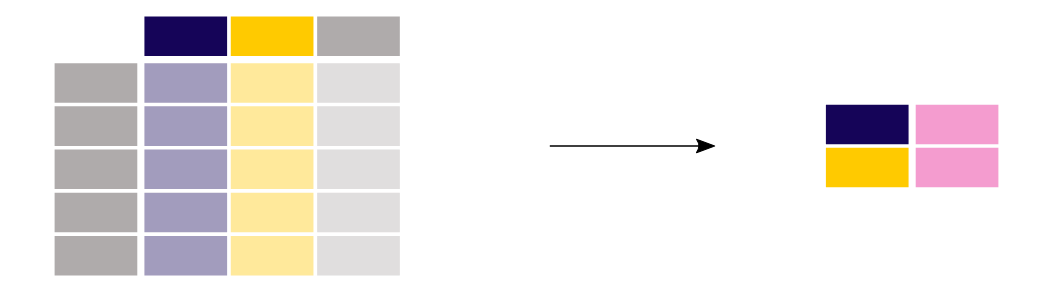

In [7]:
#Median age and ticket fare price of the titanic passengers
titanic[['Age','Fare']].median()

Age     28.0000
Fare    14.4542
dtype: float64

In [8]:
#Aggregating statistic can be calculated for multiple columns at the same time
titanic[['Age','Fare']].describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


In [10]:
#Instead of the predefined statistics, specific combinations of aggregating statistics for given columns can be defined using the .agg() method
titanic.agg(
    {
        'Age':['min','max','median','skew'],
        'Fare':['min','max','median','mean'],
    }
)

,Age,Fare
min,0.420000,0.000000
max,80.000000,512.329200
median,28.000000,14.454200
skew,0.389108,NaN
mean,NaN,32.204208


# Aggregating Statistics Grouped By Category
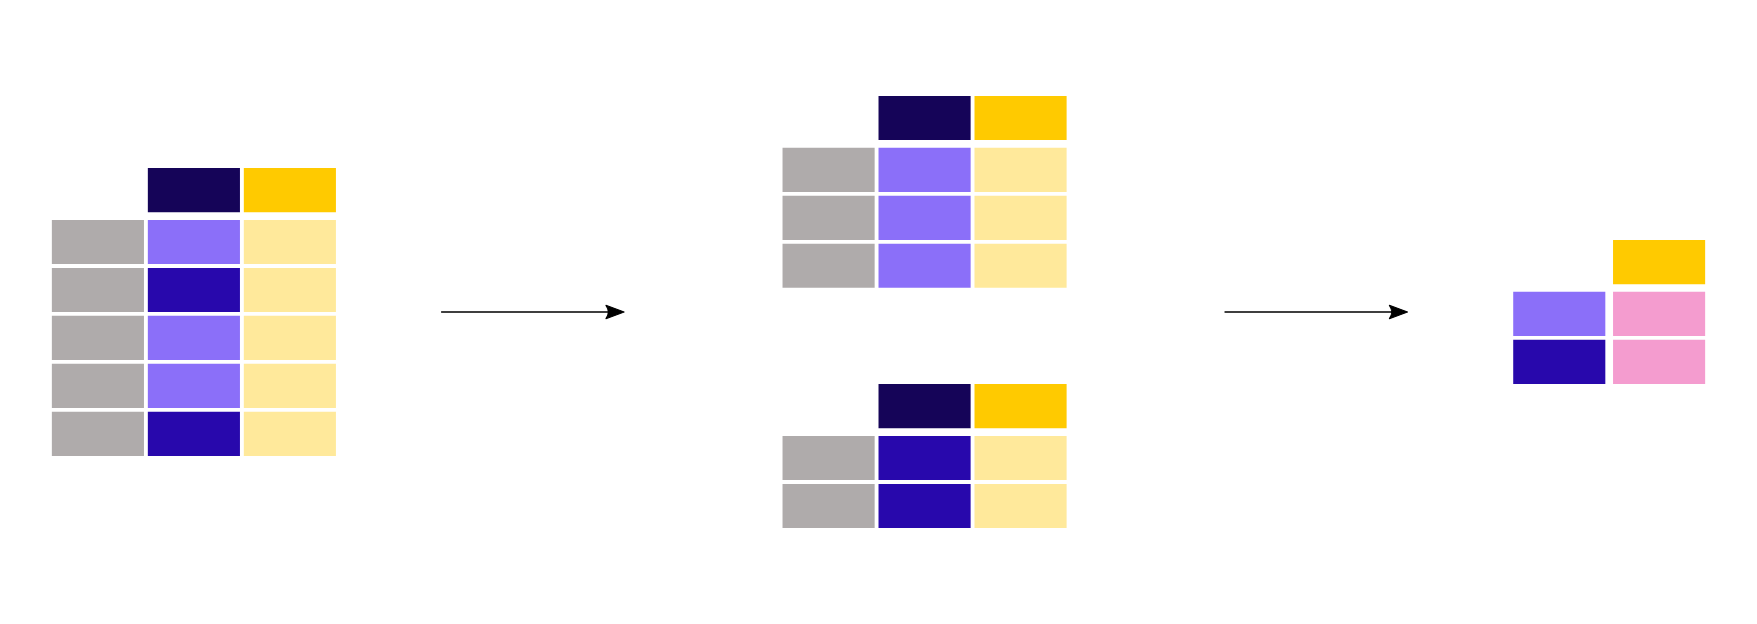

In [ ]:
#Average age for male versus female titanic passengers
titanic[['Sex','Age']].groupby('Sex').mean()

#groupby() method is applied on the Sex column to make a group per category.
#The average age for each gender is calculated and returned.

,Age
Sex,
female,27.915709
male,30.726645


# titanic                  .groupby('Sex')                   ['Age']                      .mean()
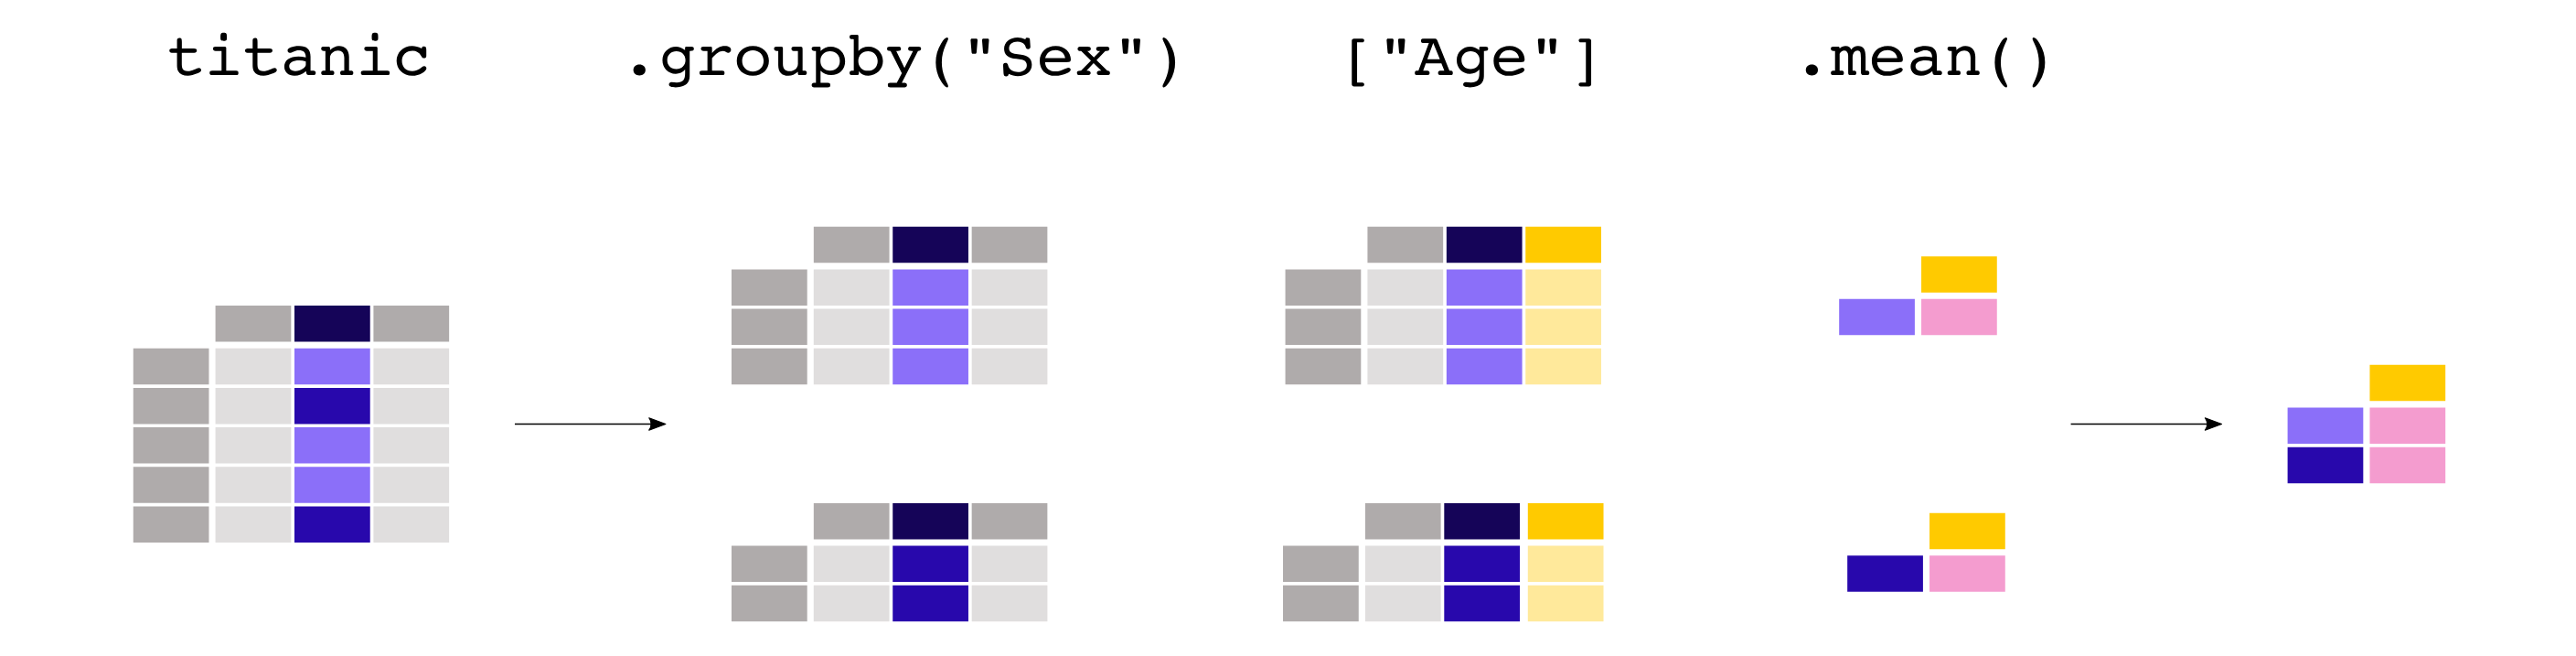

In [12]:
titanic.groupby('Sex')['Age'].mean()

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

In [13]:
titanic.groupby('Sex').mean(numeric_only=True)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,,
female,431.028662,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818
male,454.147314,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893


In [15]:
# Mean ticket fare price for each of the sex and cabin class combinations
titanic.groupby(['Sex', 'Pclass'])['Fare'].mean()

Sex     Pclass
female  1         106.125798
        2          21.970121
        3          16.118810
male    1          67.226127
        2          19.741782
        3          12.661633
Name: Fare, dtype: float64

# Count Number of Records By Category
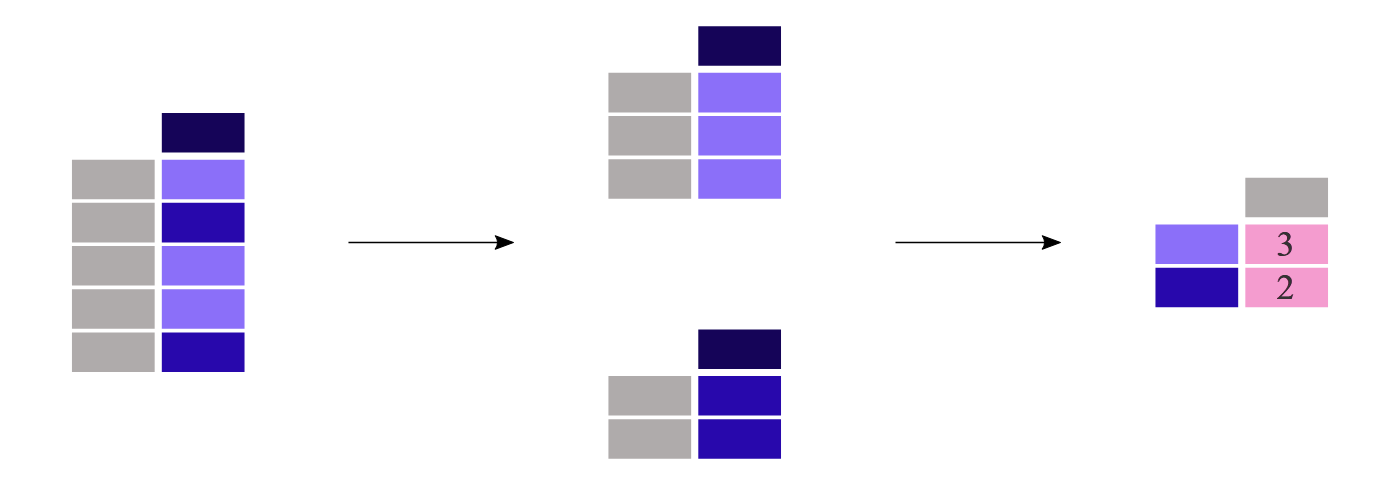


In [17]:
#Number of passengers in each of the cabin classes
#The value_counts() method counts the number of records for each category in a column
titanic['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [20]:
titanic.groupby('Pclass')['Pclass'].count()

Pclass
1    216
2    184
3    491
Name: Pclass, dtype: int64

Aggregation statistics can be calculated on entire columns or rows.

groupby provides the power of the split-apply-combine pattern.

value_counts is a convenient shortcut to count the number of entries in each category of a variable.